In [464]:
import pandas as pd
import numpy as np
import seaborn as sns
costa_rica = pd.read_csv("clean_karen.csv")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
costa_rica

,Unnamed: 0,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,ID_279628684,190000.00,0,3,0,1,1,0,NaN,...,100,1849,1,100,0,1.00,0.00,100.00,1849,4
1,1,ID_f29eb3ddd,135000.00,0,4,0,1,1,1,1.00,...,144,4489,1,144,0,1.00,64.00,144.00,4489,4
2,2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,...,121,8464,1,0,0,0.25,64.00,121.00,8464,4
3,3,ID_d671db89c,180000.00,0,5,0,1,1,1,1.00,...,81,289,16,121,4,1.78,1.00,121.00,289,4
4,4,ID_d56d6f5f5,180000.00,0,5,0,1,1,1,1.00,...,121,1369,16,121,4,1.78,1.00,121.00,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,9552,ID_d45ae367d,80000.00,0,6,0,1,1,0,NaN,...,81,2116,25,81,1,1.56,0.06,68.06,2116,2
9553,9553,ID_c94744e07,80000.00,0,6,0,1,1,0,NaN,...,0,4,25,81,1,1.56,0.06,68.06,4,2
9554,9554,ID_85fc658f8,80000.00,0,6,0,1,1,0,NaN,...,25,2500,25,81,1,1.56,0.06,68.06,2500,2
9555,9555,ID_ced540c61,80000.00,0,6,0,1,1,0,NaN,...,121,676,25,81,1,1.56,0.06,68.06,676,2


In [465]:

# drop variable elimbasu5 because all observations are 0
# this will not help model
costa_rica = costa_rica.drop(columns=["elimbasu5"])

In [466]:
def pared(row):
    if row["paredblolad"] == 1:
        val = "block or brick"
    elif row["paredzocalo"] == 1:
        val = "socket"
    elif row["paredpreb"] == 1:
        val = "prefab or cement"
    elif row["pareddes"] == 1:
        val = "waste"
    elif row["paredmad"] == 1:
        val = "wood"
    elif row["paredzinc"] == 1:
        val = "zink"
    elif row["paredfibras"] == 1:
        val = "natural fibers"
    elif row["paredother"] == 1:
        val = "other"
    
    return val

costa_rica["outside_wall_material"] = costa_rica.apply(pared, axis = 1)


In [467]:
def piso(row):
    if row["pisomoscer"] == 1:
        val = "mosaic, ceramic, terrazo"
    elif row["pisocemento"] == 1:
        val = "cement"
    elif row["pisoother"] == 1:
        val = "other"
    elif row["pisonatur"] == 1:
        val = "natural"
    elif row["pisonotiene"] == 1:
        val = "none"
    elif row["pisomadera"] == 1:
        val = "wood"
    
    return val

costa_rica["floor_material"] = costa_rica.apply(piso, axis = 1)

In [468]:
def techo(row):
    if row["techozinc"] == 1:
        val = "metal foil or zink"
    elif row["techoentrepiso"] == 1:
        val = "fiber cement, mezzanine"
    elif row["techocane"] == 1:
        val = "natural fibers"
    elif row["techootro"] == 1:
        val = "other"
    else:
        val = np.NaN
    return val

costa_rica["roof_material"] = costa_rica.apply(techo, axis = 1)

In [469]:
def abastagua(row):
    if row["abastaguadentro"] == 1:
        val = "inside"
    elif row["abastaguafuera"] == 1:
        val = "outside"
    elif row["abastaguano"] == 1:
        val = "none"
    
    return val

costa_rica["water_provision"] = costa_rica.apply(abastagua, axis = 1)

In [470]:
def elec(row):
    if row["public"] == 1:
        val = "public"
    elif row["planpri"] == 1:
        val = "private"
    elif row["noelec"] == 1:
        val = "none"
    elif row["coopele"] == 1:
        val = "cooperative"
    else:
        val = np.NaN
    return val

costa_rica["electricity"] = costa_rica.apply(elec, axis = 1)

In [471]:
def sanitario(row):
    if row["sanitario1"] == 1:
        val = "none"
    elif row["sanitario2"] == 1:
        val = "sewer or cesspool"
    elif row["sanitario3"] == 1:
        val = "septic tank"
    elif row["sanitario5"] == 1:
        val = "black hole or latrine"
    elif row["sanitario6"] == 1:
        val = "other system"
    
    return val

costa_rica["toilet"] = costa_rica.apply(sanitario, axis = 1)

In [472]:
def energcocinar(row):
    if row["energcocinar1"] == 1:
        val = "none"
    elif row["energcocinar2"] == 1:
        val = "electricity"
    elif row["energcocinar3"] == 1:
        val = "gas"
    elif row["energcocinar4"] == 1:
        val = "wood charcoal"
    
    return val

costa_rica["cooking_energy"] = costa_rica.apply(energcocinar, axis = 1)

In [473]:
def elimbasu(row):
    if row["elimbasu1"] == 1:
        val = "tanker truck"
    elif row["elimbasu2"] == 1:
        val = "botan hollow or buried"
    elif row["elimbasu3"] == 1:
        val = "burning"
    elif row["elimbasu4"] == 1:
        val = "unoccupied space"
    elif row["elimbasu6"] == 1:
        val = "other"
    
    return val

costa_rica["rubbish_disposal"] = costa_rica.apply(elimbasu, axis = 1)

In [474]:
def epared(row):
    if row["epared1"] == 1:
        val = "bad"
    elif row["epared2"] == 1:
        val = "regular"
    elif row["epared3"] == 1:
        val = "good"
    
    return val

costa_rica["wall"] = costa_rica.apply(epared, axis = 1)

In [475]:
def etecho(row):
    if row["etecho1"] == 1:
        val = "bad"
    elif row["etecho2"] == 1:
        val = "regular"
    elif row["etecho3"] == 1:
        val = "good"
    
    return val

costa_rica["roof"] = costa_rica.apply(etecho, axis = 1)

In [476]:
def eviv(row):
    if row["eviv1"] == 1:
        val = "bad"
    elif row["eviv2"] == 1:
        val = "regular"
    elif row["eviv3"] == 1:
        val = "good"
    
    return val

costa_rica["floor"] = costa_rica.apply(eviv, axis = 1)

In [477]:
costa_rica.describe()

,Unnamed: 0,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557.00,2697.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,2215.00,9557.00,...,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9552.00,9557.00,9557.00
mean,4778.00,165231.61,0.04,4.96,0.02,0.99,0.96,0.23,1.40,0.39,...,74.22,1643.77,19.13,53.50,3.84,3.25,3.90,102.59,1643.77,3.30
std,2759.01,150457.13,0.19,1.47,0.15,0.07,0.20,0.42,0.76,0.68,...,76.78,1741.20,18.75,78.45,6.95,4.13,12.51,93.52,1741.20,1.01
min,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.04,0.00,0.00,0.00,1.00
25%,2389.00,80000.00,0.00,4.00,0.00,1.00,1.00,0.00,1.00,0.00,...,16.00,289.00,9.00,0.00,0.00,1.00,0.11,36.00,289.00,3.00
50%,4778.00,130000.00,0.00,5.00,0.00,1.00,1.00,0.00,1.00,0.00,...,36.00,961.00,16.00,36.00,1.00,2.25,0.44,81.00,961.00,4.00
75%,7167.00,200000.00,0.00,6.00,0.00,1.00,1.00,0.00,2.00,1.00,...,121.00,2601.00,25.00,81.00,4.00,4.00,1.78,134.56,2601.00,4.00
max,9556.00,2353477.00,1.00,11.00,1.00,1.00,1.00,1.00,6.00,5.00,...,441.00,9409.00,169.00,441.00,81.00,36.00,64.00,1369.00,9409.00,4.00


In [478]:
costa_rica.describe(include='object')

,Id,idhogar,outside_wall_material,floor_material,roof_material,water_provision,electricity,toilet,cooking_energy,rubbish_disposal,wall,roof,floor
count,9557,9557,9557,9557,9491,9557,9542,9557,9557,9557,9557,9557,9557
unique,9557,2988,8,6,4,3,4,5,4,5,3,3,3
top,ID_279628684,fd8a6d014,block or brick,"mosaic, ceramic, terrazo",metal foil or zink,inside,public,septic tank,electricity,tanker truck,good,good,good
freq,1,13,5677,6621,9271,9220,8459,7304,4679,8436,5449,5577,6175


In [479]:
costa_rica.isnull().sum()[costa_rica.isnull().sum() != 0]

v2a1             6860
v18q1            7342
rez_esc          7928
edjefe            123
edjefa             69
meaneduc            5
SQBmeaned           5
roof_material      66
electricity        15
dtype: int64

Target
1     755
2    1597
3    1209
4    5996
dtype: int64


<Axes: ylabel='Frequency'>

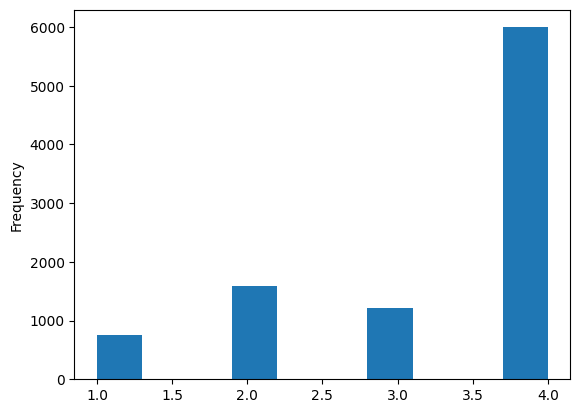

In [480]:
print(costa_rica.groupby("Target").size())
costa_rica["Target"].plot(kind = "hist")

<Axes: xlabel='v2a1', ylabel='Count'>

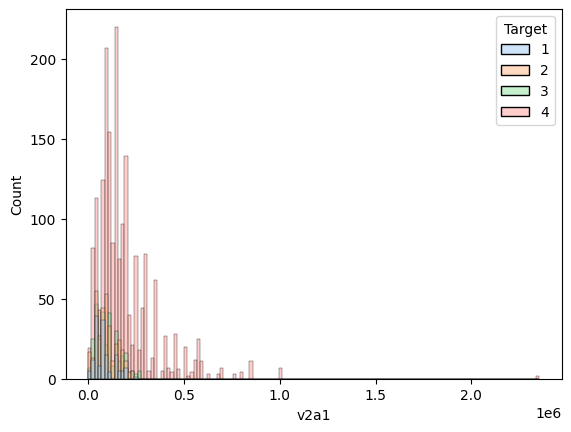

In [481]:
num_cols = ["v2a1", "hacdor", "rooms", "hacapo", "v14a", "refrig", "v18q", "v18q1", 
        "r4h1", "r4h2", "r4h3", "r4m1", "r4m2", "r4m3", "r4t1", "r4t2", "r4t3",
        "tamhog", "tamviv", "escolari", "rez_esc", "hhsize", "cielorazo"]
sns.histplot(data = costa_rica, x="v2a1", hue="Target", palette = "pastel")

<Axes: xlabel='v2a1', ylabel='Count'>

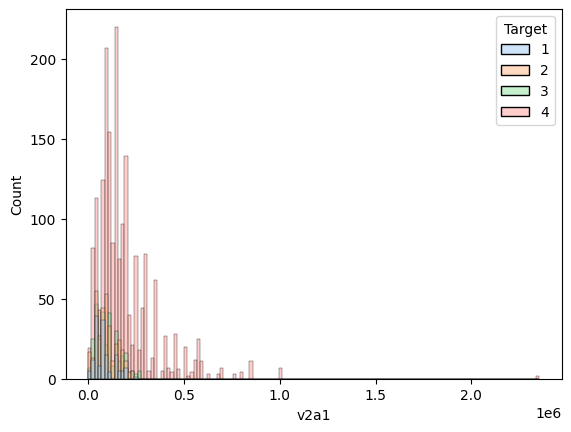

In [482]:
sns.histplot(data = costa_rica, x="v2a1", hue="Target", palette = "pastel")

<Axes: xlabel='hacdor', ylabel='Count'>

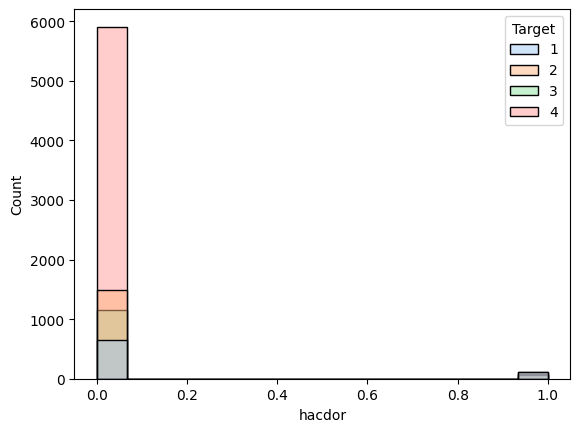

In [483]:
sns.histplot(data = costa_rica, x="hacdor", hue="Target", palette = "pastel")

<Axes: xlabel='rooms', ylabel='Count'>

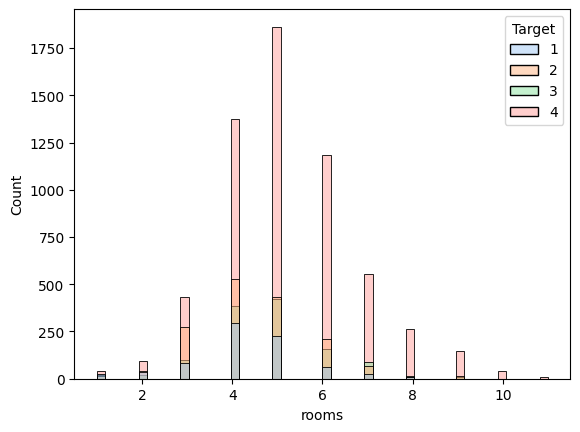

In [484]:
sns.histplot(data = costa_rica, x="rooms", hue="Target", palette = "pastel")

<Axes: xlabel='hacapo', ylabel='Count'>

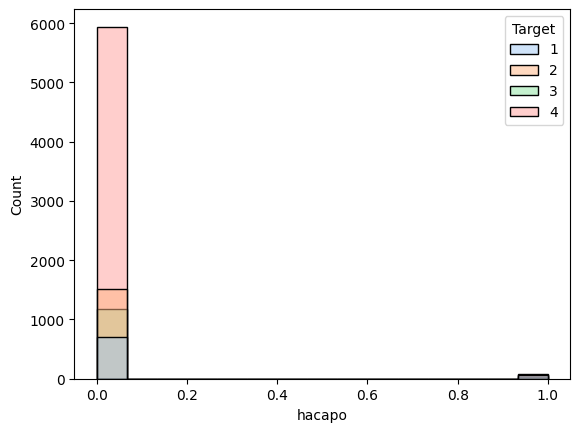

In [485]:
sns.histplot(data = costa_rica, x="hacapo", hue="Target", palette = "pastel")

<Axes: xlabel='v14a', ylabel='Count'>

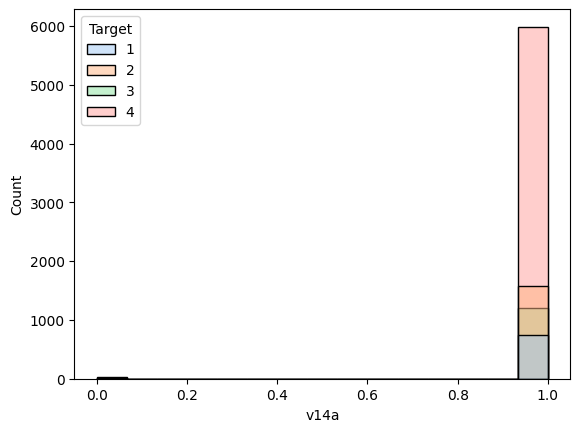

In [486]:
sns.histplot(data = costa_rica, x="v14a", hue="Target", palette = "pastel")

<Axes: xlabel='refrig', ylabel='Count'>

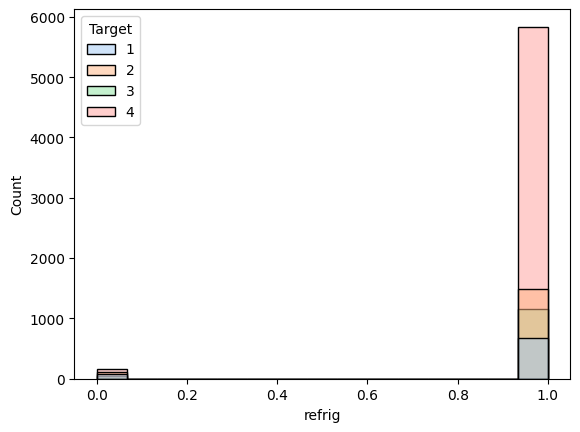

In [487]:
sns.histplot(data = costa_rica, x="refrig", hue="Target", palette = "pastel")

<Axes: xlabel='v18q', ylabel='Count'>

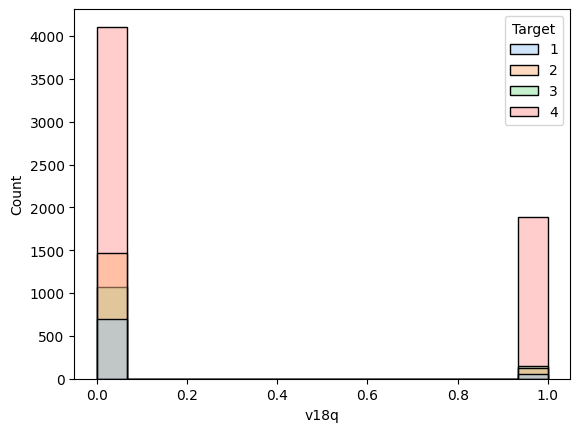

In [488]:
sns.histplot(data = costa_rica, x="v18q", hue="Target", palette = "pastel")

<Axes: xlabel='v18q1', ylabel='Count'>

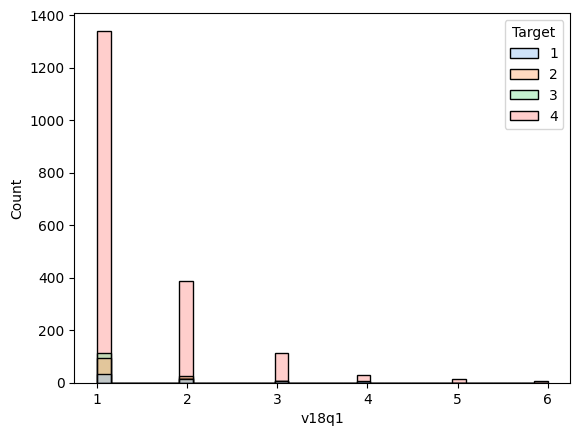

In [489]:
sns.histplot(data = costa_rica, x="v18q1", hue="Target", palette = "pastel")

<Axes: xlabel='r4h1', ylabel='Count'>

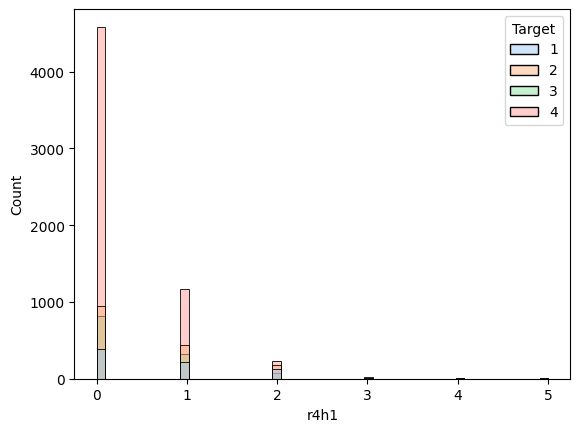

In [490]:
sns.histplot(data = costa_rica, x="r4h1", hue="Target", palette = "pastel")

<Axes: xlabel='r4h2', ylabel='Count'>

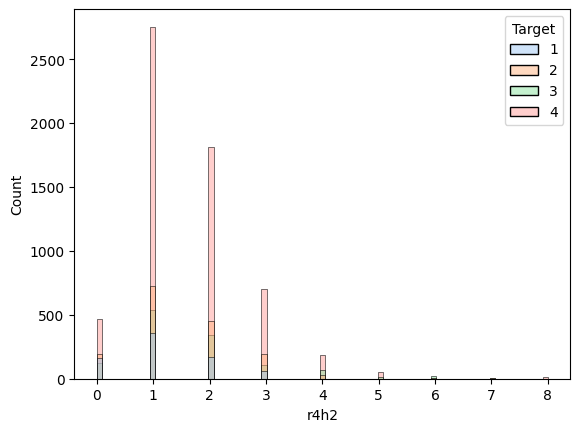

In [491]:
sns.histplot(data = costa_rica, x="r4h2", hue="Target", palette = "pastel")

<Axes: xlabel='r4h3', ylabel='Count'>

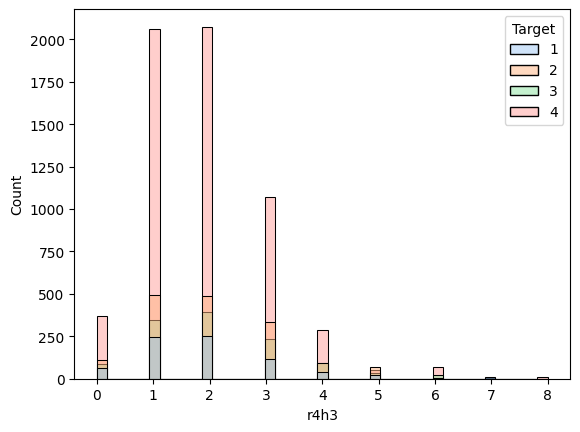

In [492]:

sns.histplot(data = costa_rica, x="r4h3", hue="Target", palette = "pastel")

<Axes: xlabel='r4m1', ylabel='Count'>

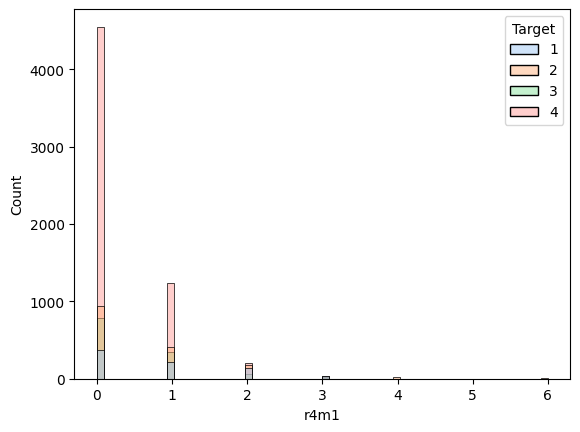

In [493]:
sns.histplot(data = costa_rica, x="r4m1", hue="Target", palette = "pastel")

<Axes: xlabel='r4m2', ylabel='Count'>

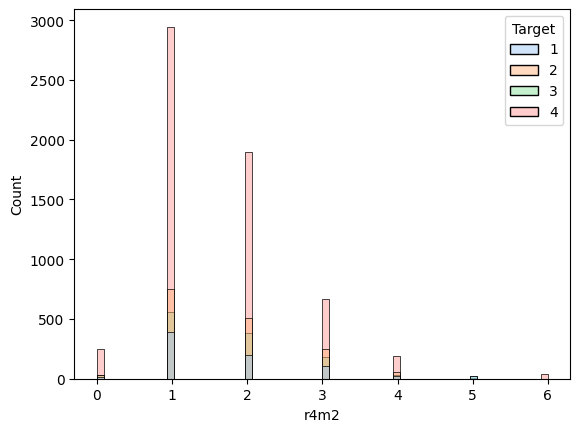

In [494]:
sns.histplot(data = costa_rica, x="r4m2", hue="Target", palette = "pastel")

<Axes: xlabel='r4m3', ylabel='Count'>

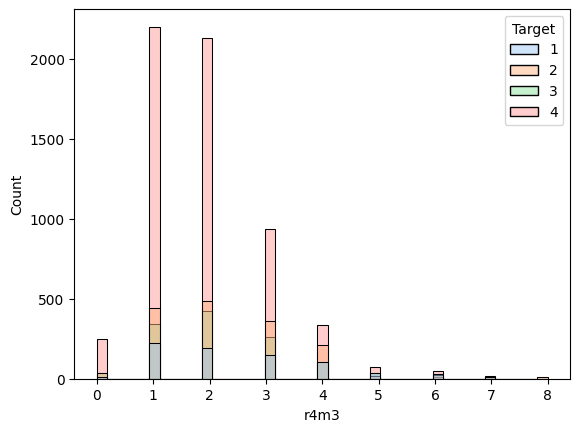

In [495]:
sns.histplot(data = costa_rica, x="r4m3", hue="Target", palette = "pastel")

<Axes: xlabel='r4t1', ylabel='Count'>

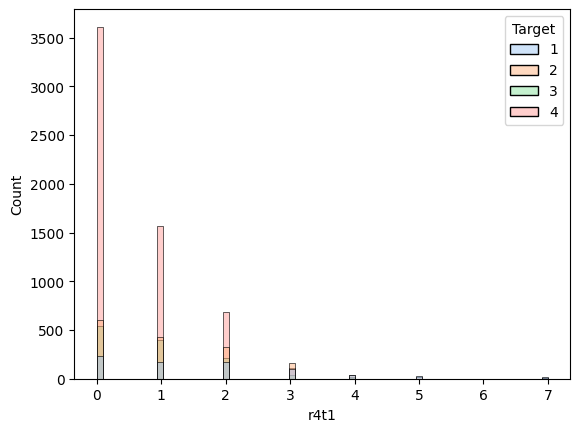

In [496]:
sns.histplot(data = costa_rica, x="r4t1", hue="Target", palette = "pastel")

<Axes: xlabel='r4t2', ylabel='Count'>

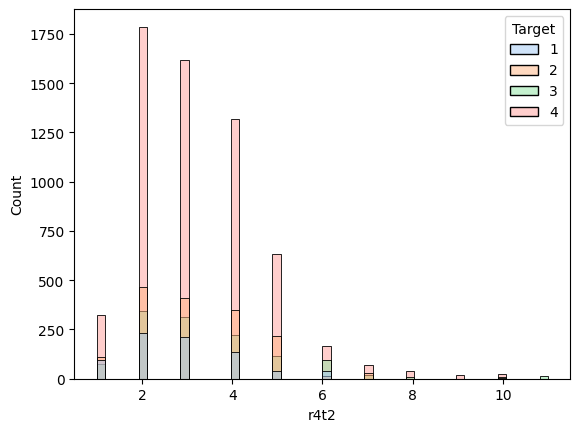

In [497]:
sns.histplot(data = costa_rica, x="r4t2", hue="Target", palette = "pastel")

<Axes: xlabel='r4t3', ylabel='Count'>

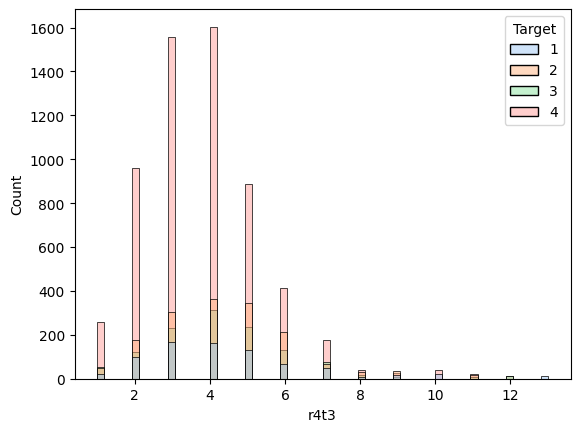

In [498]:
sns.histplot(data = costa_rica, x="r4t3", hue="Target", palette = "pastel")

<Axes: xlabel='tamhog', ylabel='Count'>

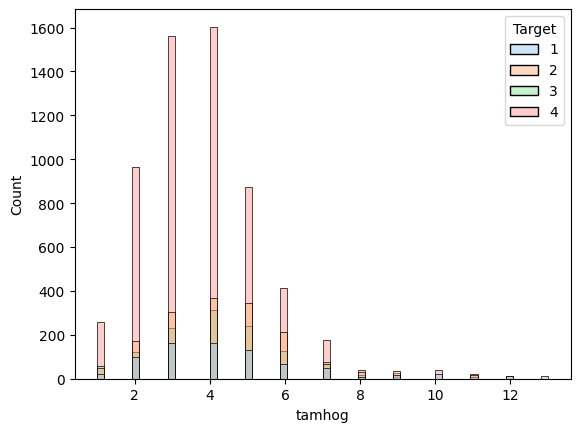

In [499]:
sns.histplot(data = costa_rica, x="tamhog", hue="Target", palette = "pastel")

<Axes: xlabel='tamviv', ylabel='Count'>

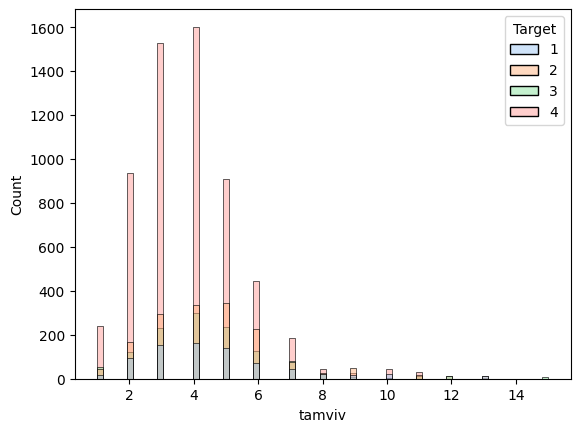

In [500]:
sns.histplot(data = costa_rica, x="tamviv", hue="Target", palette = "pastel")

<Axes: xlabel='escolari', ylabel='Count'>

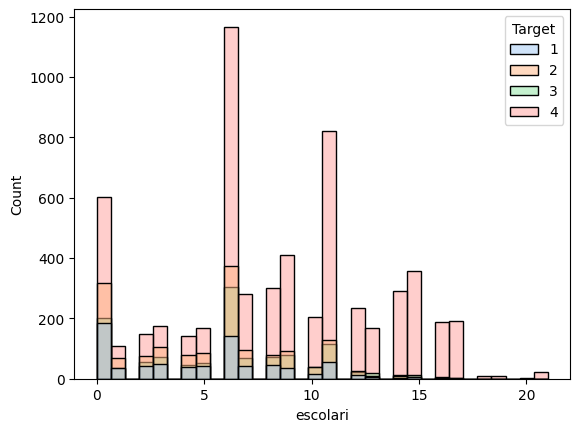

In [501]:
sns.histplot(data = costa_rica, x="escolari", hue="Target", palette = "pastel")

<Axes: xlabel='rez_esc', ylabel='Count'>

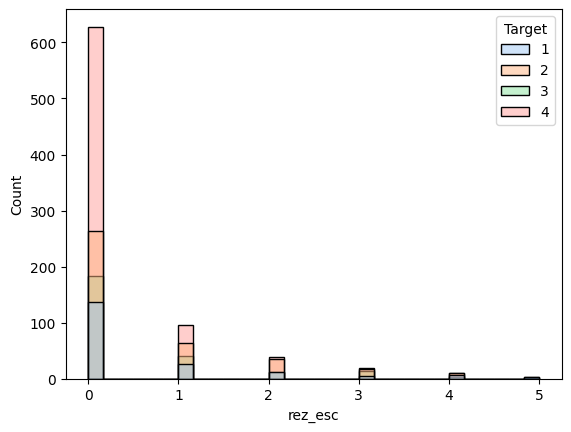

In [502]:
sns.histplot(data = costa_rica, x="rez_esc", hue="Target", palette = "pastel")

<Axes: xlabel='hhsize', ylabel='Count'>

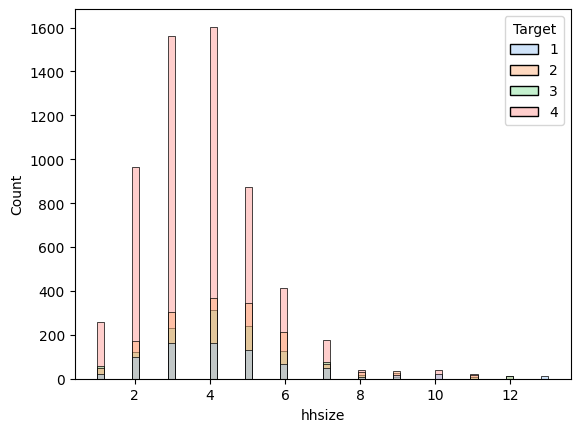

In [503]:
sns.histplot(data = costa_rica, x="hhsize", hue="Target", palette = "pastel")

<Axes: xlabel='cielorazo', ylabel='Count'>

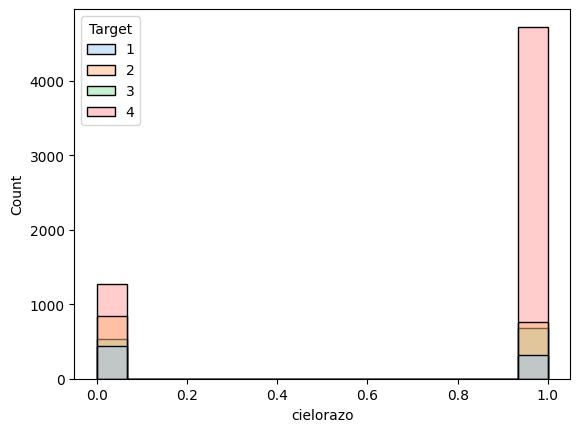

In [504]:
sns.histplot(data = costa_rica, x="cielorazo", hue="Target", palette = "pastel")

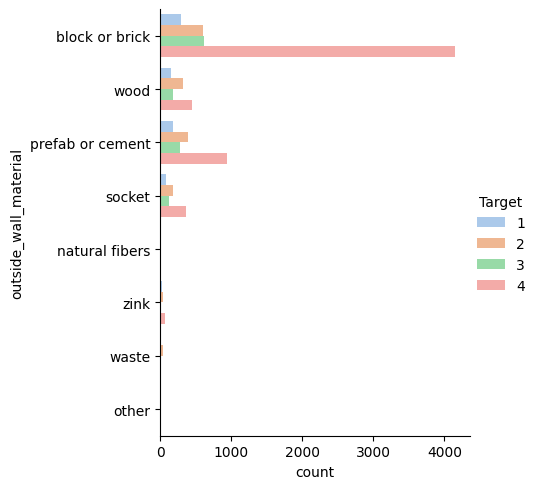

In [505]:
cat_cols = ["outside_wall_material", "floor_material", "roof_material", "water_provision",
          "electricity", "toilet", "cooking_energy", "rubbish_disposal", "wall", "roof", "floor"]
sns.catplot(data=costa_rica, y="outside_wall_material", hue="Target", kind="count", palette="pastel")

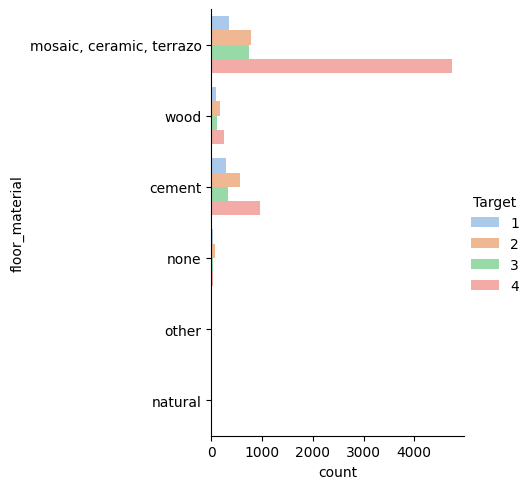

In [506]:
sns.catplot(data=costa_rica, y="floor_material", hue="Target", kind="count", palette="pastel")

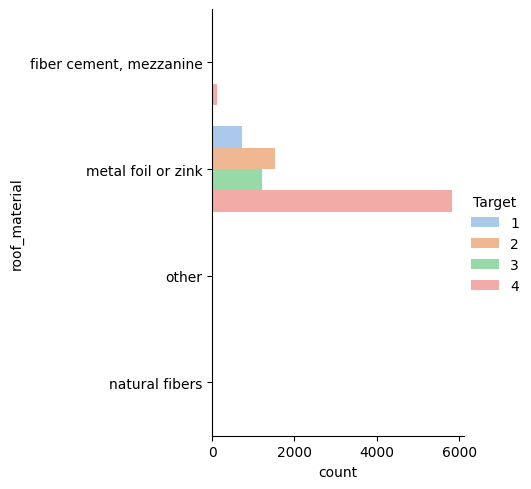

In [507]:
sns.catplot(data=costa_rica, y="roof_material", hue="Target", kind="count", palette="pastel")

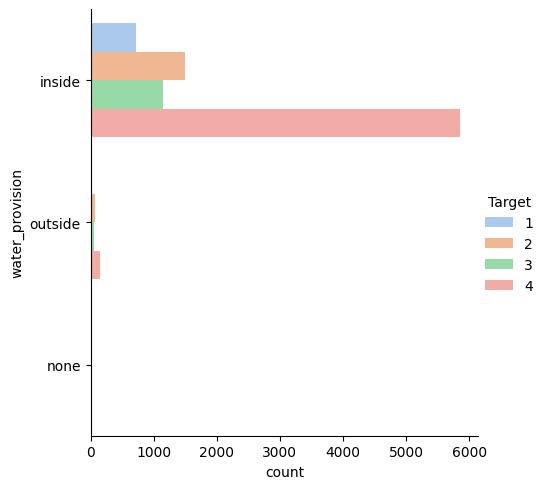

In [508]:
sns.catplot(data=costa_rica, y="water_provision", hue="Target", kind="count", palette="pastel")

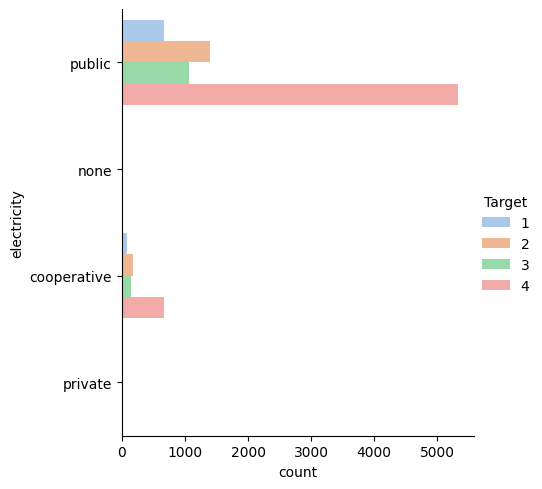

In [509]:
sns.catplot(data=costa_rica, y="electricity", hue="Target", kind="count", palette="pastel")

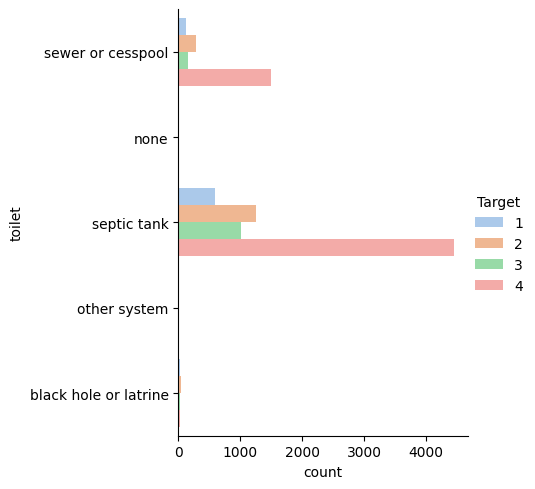

In [510]:
sns.catplot(data=costa_rica, y="toilet", hue="Target", kind="count", palette="pastel")

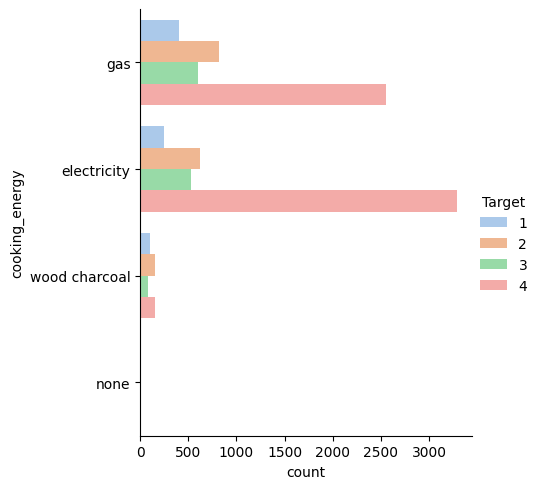

In [511]:
sns.catplot(data=costa_rica, y="cooking_energy", hue="Target", kind="count", palette="pastel")

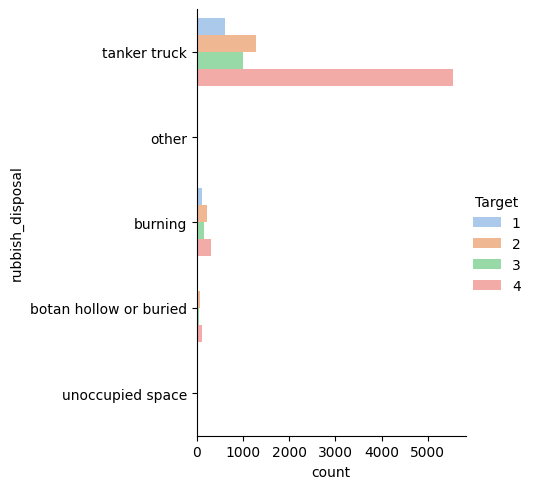

In [512]:
sns.catplot(data=costa_rica, y="rubbish_disposal", hue="Target", kind="count", palette="pastel")

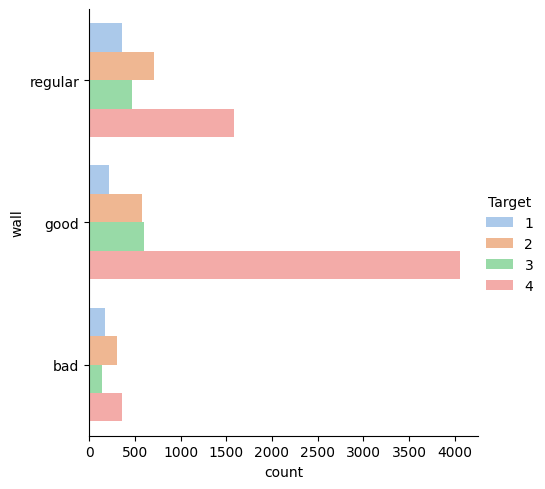

In [513]:
sns.catplot(data=costa_rica, y="wall", hue="Target", kind="count", palette="pastel")

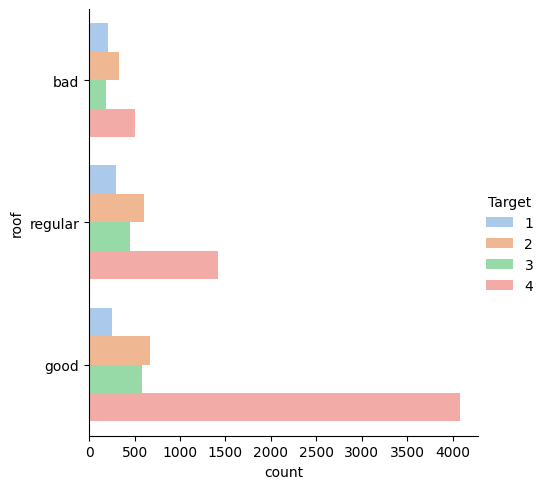

In [514]:
sns.catplot(data=costa_rica, y="roof", hue="Target", kind="count", palette="pastel")

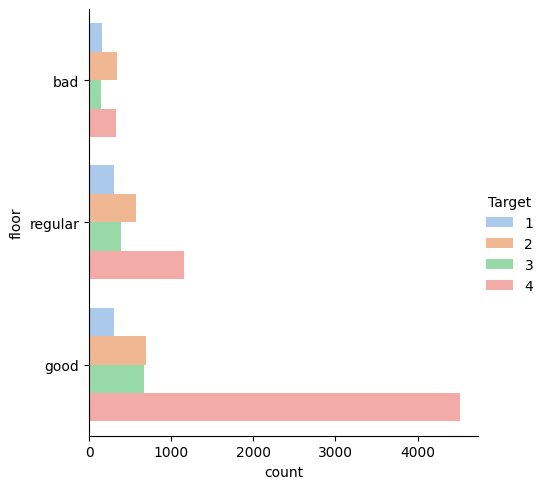

In [515]:
sns.catplot(data=costa_rica, y="floor", hue="Target", kind="count", palette="pastel")

In [516]:
# Drop redundant quadratic variables
costa_rica = costa_rica.drop(columns=["SQBescolari", "SQBage", "SQBhogar_total", "SQBedjefe", 
        "SQBhogar_nin", "SQBovercrowding", "SQBdependency", "SQBmeaned", "agesq"])

In [517]:
ind = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone','rez_esc', 'escolari', 'age']
hh = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
            'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2','rooms', 'r4h1', 'r4h2', 
           'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone',
              'v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [518]:
# Code adapted from https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
corr_matrix = vars.corr().abs()
correlations = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().sort_values(ascending=False))
print(correlations.head(20))

area1            area2            1.00
hhsize           hogar_total      1.00
tamhog           hogar_total      1.00
                 hhsize           1.00
male             female           1.00
r4t3             hogar_total      1.00
                 tamhog           1.00
                 hhsize           1.00
public           coopele          0.98
abastaguadentro  abastaguafuera   0.95
r4t3             tamviv           0.95
tamhog           tamviv           0.94
tamviv           hhsize           0.94
                 hogar_total      0.94
sanitario2       sanitario3       0.94
energcocinar2    energcocinar3    0.90
elimbasu1        elimbasu3        0.83
r4h2             r4h3             0.82
r4m2             r4m3             0.82
r4t2             r4t3             0.81
dtype: float64


In [519]:
# Drop variables with perfect correlation
costa_rica = costa_rica.drop(columns=["area2","hogar_total", "tamhog", "hhsize", "male"])

**Aggregating to household level**

In [520]:
# Drop individual level variables already captured at household level
costa_rica = costa_rica.drop(columns=["v18q","mobilephone"])

In [521]:
# Aggregate variables to household level
costa_rica["num_dis"] = costa_rica.groupby("idhogar")["dis"].transform(np.sum)
costa_rica["avg_school"] = costa_rica.groupby("idhogar")["escolari"].transform(np.mean)
costa_rica["avg_behind_school"] = costa_rica.groupby("idhogar")["rez_esc"].transform(np.mean)


/var/folders/n1/6wbb6bb96cs6326m2jt0gqkc0000gn/T/ipykernel_57943/1422401274.py:2: FutureWarning: The provided callable <function sum at 0x11c833920> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  costa_rica["num_dis"] = costa_rica.groupby("idhogar")["dis"].transform(np.sum)
/var/folders/n1/6wbb6bb96cs6326m2jt0gqkc0000gn/T/ipykernel_57943/1422401274.py:3: FutureWarning: The provided callable <function mean at 0x11c84ca40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  costa_rica["avg_school"] = costa_rica.groupby("idhogar")["escolari"].transform(np.mean)
/var/folders/n1/6wbb6bb96cs6326m2jt0gqkc0000gn/T/ipykernel_57943/1422401274.py:4: FutureWarning: The provided callable <function mean at 0x11c84ca40> is currently using SeriesGroupBy.mean.

In [522]:
# We are interested in the head of household
costa_rica = costa_rica.drop(columns=["parentesco2",  "parentesco3", "parentesco4", "parentesco5", 
            "parentesco6", "parentesco7", "parentesco8",  "parentesco9", "parentesco10", 
            "parentesco11", "parentesco12"])
costa_rica = costa_rica.loc[costa_rica["parentesco1"] == 1]

In [523]:
# Drop string variables used for data exploration
costa_rica = costa_rica.drop(columns=["outside_wall_material", "floor_material",
                                      "roof_material", "water_provision", "electricity",
                                      "toilet","cooking_energy", "rubbish_disposal",
                                      "wall","roof","floor"])
costa_rica

,Unnamed: 0,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,...,lugar3,lugar4,lugar5,lugar6,area1,age,Target,num_dis,avg_school,avg_behind_school
0,0,ID_279628684,190000.00,0,3,0,1,1,NaN,0,...,0,0,0,0,1,43,4,0,10.00,NaN
1,1,ID_f29eb3ddd,135000.00,0,4,0,1,1,1.00,0,...,0,0,0,0,1,67,4,0,12.00,NaN
2,2,ID_68de51c94,NaN,0,8,0,1,1,NaN,0,...,0,0,0,0,1,92,4,1,11.00,NaN
5,5,ID_ec05b1a7b,180000.00,0,5,0,1,1,1.00,0,...,0,0,0,0,1,38,4,0,8.25,0.50
8,8,ID_1284f8aad,130000.00,1,2,0,1,1,NaN,0,...,0,0,0,0,1,30,4,0,5.75,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,9535,ID_18b0a845b,NaN,0,4,0,1,0,NaN,1,...,0,0,0,1,0,26,1,0,1.80,1.00
9541,9541,ID_a31274054,NaN,0,3,0,0,0,NaN,2,...,0,0,0,1,0,40,2,2,3.40,0.00
9545,9545,ID_32a00a8bf,46500.00,0,5,0,1,1,NaN,1,...,0,0,0,1,0,45,4,0,6.00,NaN
9551,9551,ID_79d39dddc,NaN,0,3,0,1,1,NaN,0,...,0,0,0,1,0,67,2,0,3.00,NaN


In [524]:
costa_rica.to_csv("clean_cr.csv")